# Chipotle clustering challenge

- Repository: `clustering`
- Type of Challenge: `Learning`
- Duration: `1 day`
- Deployment strategy :
	- Github page
- Team challenge : `yes (max 4)`
	- visualization: 1
	- data analysis: 2
	- project management : 1

## Learning Objectives 

- visualization: to be able to use geopandas, matplotlib (and seaborn) to visualize clustered data onto a map
- data analysis: to be able to determine appropriate clustering methods and variables to cluster 
- data analysis: to evaluate the chosen clustering method in comparison to other methods 
- project managment: to be able to allot the right amount of time for the tasks and present the results onto a readable github page

## The Mission

<img src="https://media.giphy.com/media/l3vR4Fp4U1DhW8bhS/giphy.gif" align="right" width="450"/>

>"Honey, where do you wanna eat?"
>
>"Do you even have to ask? Chipotle, of course!"
>
>"How could I forget, we've been eating chipotle for the last 47 days..."
>
>"So get ready for number 48! Oh I can't wait to stuff my face with a burrito!"
>
>"But the closest one is an hour drive away, couldn't we just get mcdonalds?"
>
>"How dare you utter that word in my presence? First the neighbours, now you!"
>
>"The neighbours? What do they have to d-"
>
>"That's it, we're moving, I can't deal with this anti-chipotle fascism."

Find chipotle **epicentres** to live your ideal chipotle lifestyle by clustering the [chipotle](./assets/chipotle_locations.csv) dataset.

### Must-have features

- A visualisation of the USA with chipotle locations
- Visualization of the different clusters
- Intrinsic analysis comparison of the clusters of at least 2 methods with varying arguments (using euclidian distance as criteria)
- A chosen centroid to live. Make your argument of why the chosen centroid is superior to others. Examples of arguments are:
    - highest density
    - greatest uninterrupted link of chipotle locations with smallest link-to-link distance
    - ...
- a Github page where results are visualized


### Nice-to-have features

- Colour coded cluster visualisation
- Clear graph legends

## Deliverables
1. Publish your source code on the GitHub repository.
2. Make a clear github page explaining your results and methods
3. A chosen adress for the couple to live

### Steps
1. Create the repository
2. Install geopandas
3. Plot the [US map](https://jcutrer.com/python/learn-geopandas-plotting-usmaps)
4. Visualize your data on this map
5. Plot a [dendogram](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html) of your data to help you decide the appropropriate clustering resolution
6. Compare and analyse different [clustering methods](https://scikit-learn.org/stable/modules/clustering.html) using intrinsic analysis to decide on a chosen method.
7. Choose a centroid/adress to live
8. Publish your results to a Github page with an explanation of your method.

## Evaluation criterias
| Criteria       | Indicator                                                                             | Yes/No |
|----------------|---------------------------------------------------------------------------------------|--------|
| 1. Is complete | The student has realized all must-have features.                                      |        |
|                | There is a published GitHub page available showing the visualized results                                           |        | A US location has been selected an arguments for choosing it has been given
|                | ...                               					                                 |        |
|                | ...                                                                                   |        |
| 3. Is Correct  | All participants have contributed to the git repository										                                         	 |        |
|                | All data is visualised clearly and interpretably								                                                     |        | The method and progress of the project is detailed in the git repository


## A final note of encouragement


![You've got this!](https://media.giphy.com/media/gJuZSbDxv0zLTMdafV/giphy.gif)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline 

In [2]:
df = pd.read_csv('./assets/chipotle_stores.csv')

In [3]:
df.head()

,state,location,address,latitude,longitude
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220


In [4]:
df.state.unique() 

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'Washington DC',
       'West Virginia', 'Wisconsin', 'North Dakota', 'Wyoming'],
      dtype=object)

In [5]:
df['state'].value_counts()

California        421
Texas             226
Ohio              193
Florida           177
New York          160
Illinois          144
Virginia          107
Pennsylvania       96
Maryland           94
Arizona            85
Colorado           79
Minnesota          71
New Jersey         69
North Carolina     65
Massachusetts      62
Georgia            61
Washington         43
Indiana            40
Michigan           39
Missouri           39
Oregon             32
Kansas             30
Nevada             29
Tennessee          26
Connecticut        24
Washington DC      21
South Carolina     21
Kentucky           21
Wisconsin          20
Alabama            15
Oklahoma           12
Utah               11
Nebraska           10
Iowa               10
Louisiana          10
Rhode Island        9
New Mexico          9
Delaware            9
New Hampshire       8
Arkansas            6
West Virginia       6
Maine               5
Idaho               4
Montana             3
North Dakota        2
Vermont   

## Chose to live at Califonia

In [6]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.metrics import silhouette_score
import numpy as np

In [7]:
filt = df.state =='California'

df_ca = df[filt] 

In [8]:
df_ca.reset_index(inplace=True)

In [9]:
df_ca = df_ca[['latitude', 'longitude']]

In [10]:
df_ca

,latitude,longitude
0,37.756121,-122.250114
1,37.786141,-122.281207
2,34.092555,-118.145842
3,33.576980,-117.725426
4,33.839580,-117.888675
...,...,...
416,33.941058,-118.046211
417,33.944400,-117.994826
418,34.169821,-118.605285
419,34.187712,-118.598003


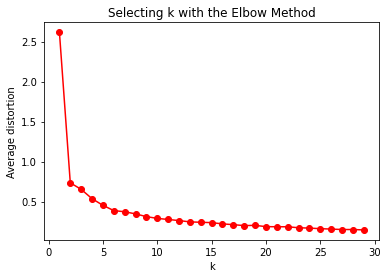

In [11]:
clusters = range(1,30)

meanDistortions = []

for k in clusters:
    km = KMeans(n_clusters=k)
    km.fit(df_ca)
    predict=km.predict(df_ca)
    meanDistortions.append(sum(np.min(cdist(df_ca,km.cluster_centers_, 'euclidean'), axis=1)) / 
                           df_ca.shape[0])

plt.plot(clusters, meanDistortions, 'ro-')

plt.title('Selecting k with the Elbow Method')

plt.xlabel('k');

plt.ylabel('Average distortion');

In [12]:
# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=5).fit(df_ca)  

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
df_ca = df_ca.join(cluster_labels.to_frame())

In [13]:
lat = []
lon = []
for i in cluster_centers:
    lon.append(i[0])
    lat.append(i[1])

In [14]:
df_cluster = pd.DataFrame(lat,lon).reset_index()

In [15]:
df_cluster.columns = ['lat', 'lon']

In [20]:
fig_px = px.scatter_mapbox(df_ca, lat="latitude", lon="longitude",color="cluster",hover_name="cluster", zoom=5, height=500)

fig_px.update_layout(mapbox_style="open-street-map",margin={"r":0,"t":0,"l":0,"b":0})

fig_px.show()

In [17]:
fig_px = px.scatter_mapbox(df_cluster, lat="lat", lon="lon", size_max=20,zoom=3, height=500)

fig_px.update_layout(mapbox_style="open-street-map",margin={"r":0,"t":0,"l":0,"b":0})

fig_px.show()

In [18]:
fig_px.write_html("chipotle_locations_ca.html")